# Part B - Question 8

**Un-Supervised Learning Algorithms - Hierarchical Clustering:** Using any dataset implement Hierarchical Clustering (AGNES and DIANA). Plot the Dendrogram for Hierarchical Clustering and analyze your result. Plot the clustering output for the same dataset using these two hierarchical techniques. Compare the results. Write the inference.

## Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualise iris

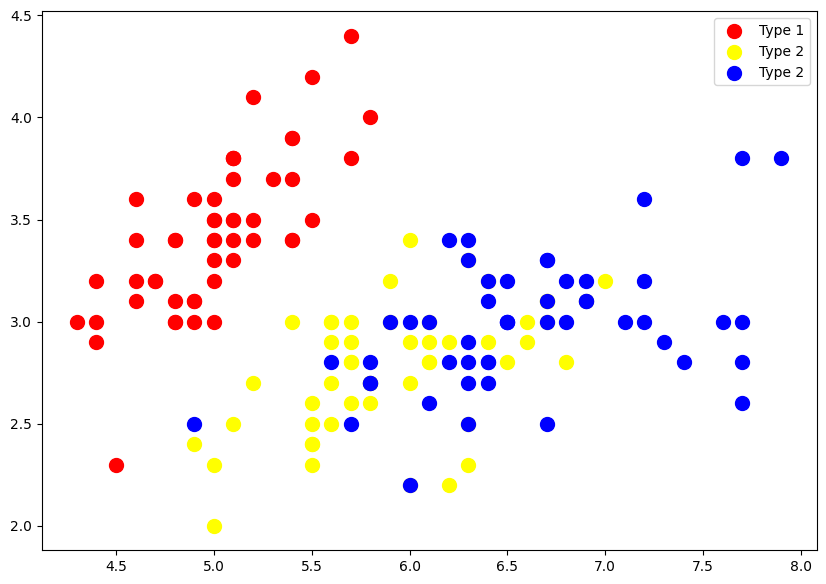

In [2]:
X = iris_data.drop('flower_type',axis=1).values
Y=iris_data['flower_type'].values

plt.figure(figsize=(10,7))
plt.scatter(X[Y==0,0],X[Y==0,1],s=100,c='red',label='Type 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=100,c='yellow',label='Type 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=100,c='blue',label='Type 2')
plt.legend()

## Dendo for AGNES

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

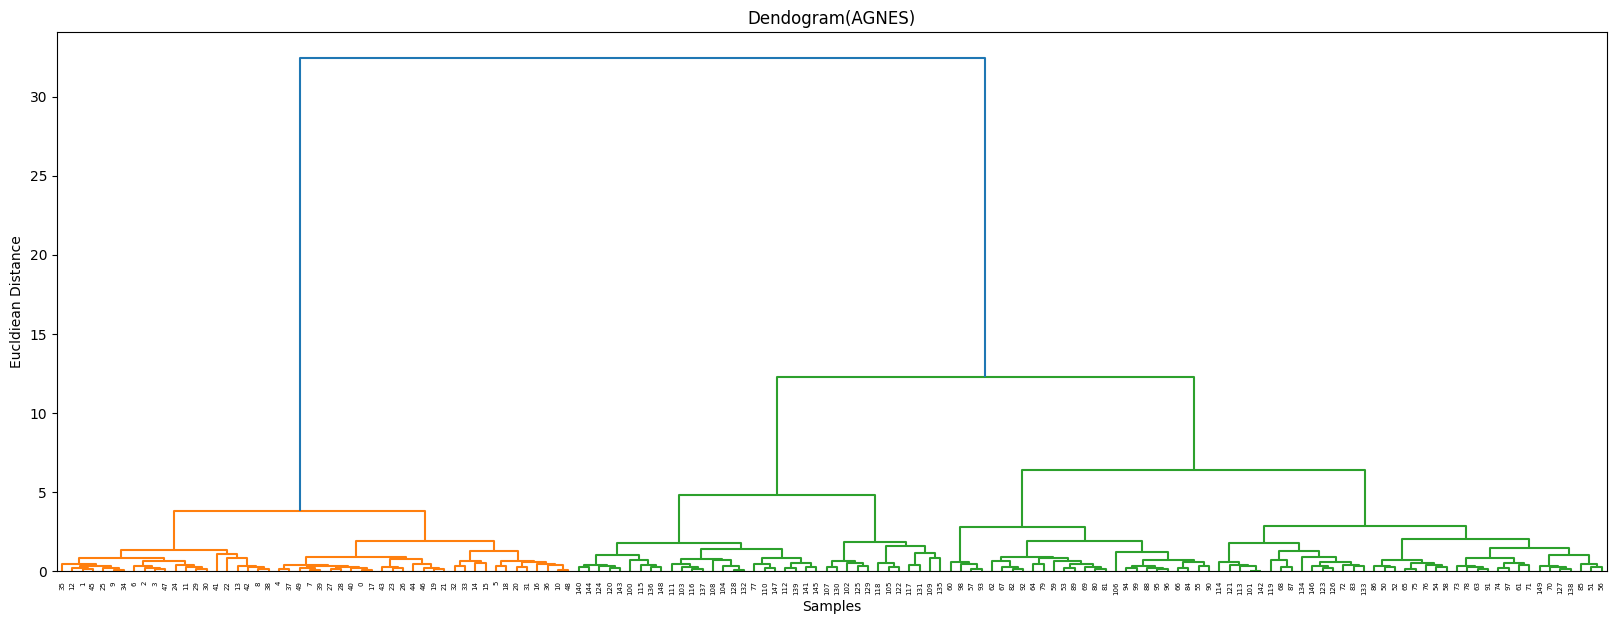

In [3]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram(AGNES)")
plt.xlabel("Samples")
plt.ylabel("Eucldiean Distance")
sc.dendrogram(sc.linkage(X,method='ward'))


## Dendo for DIANA

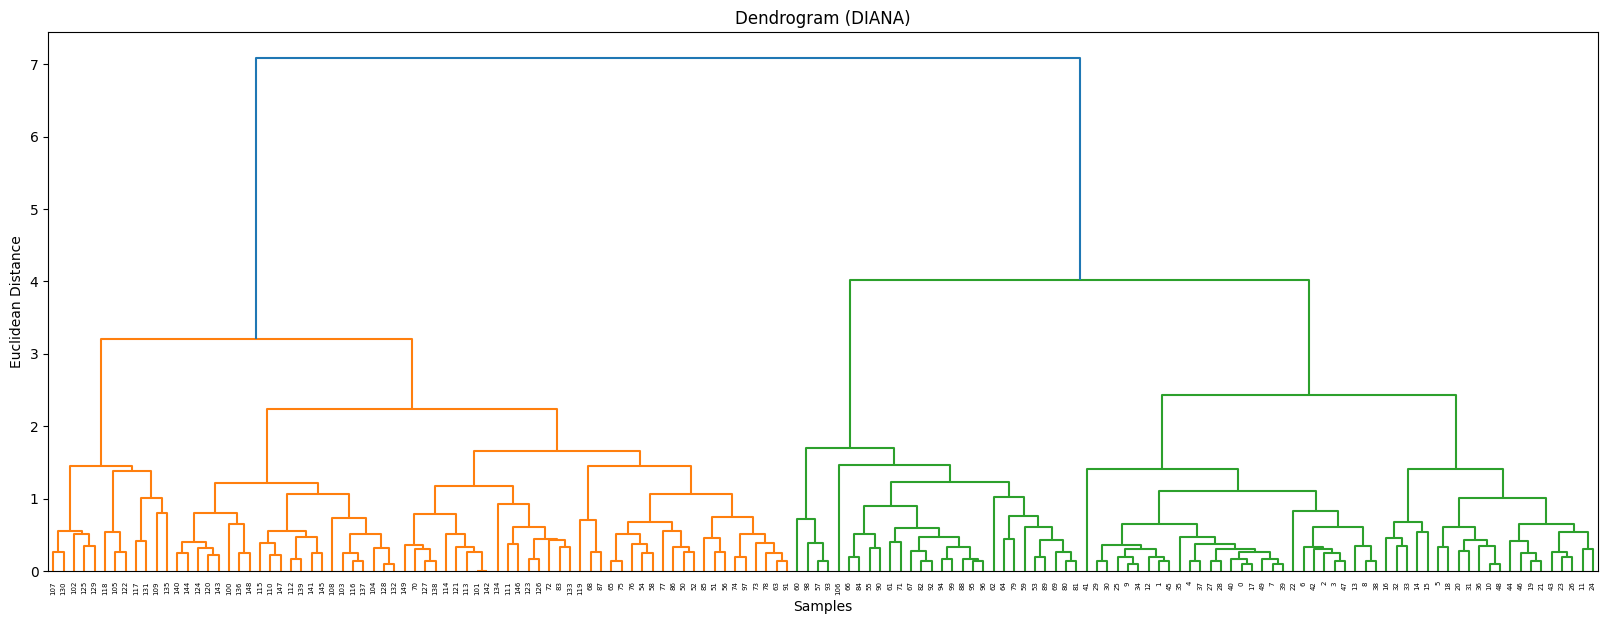

In [4]:
# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram for DIANA
sc.dendrogram(sc.linkage(X, method='complete'))

# Plot the Dendrogram
plt.title('Dendrogram (DIANA)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

## Fit for Agnes

In [5]:
from sklearn.cluster import AgglomerativeClustering

a_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

a_cluster.fit(X)
a_labels=a_cluster.labels_

c:\Users\suhas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


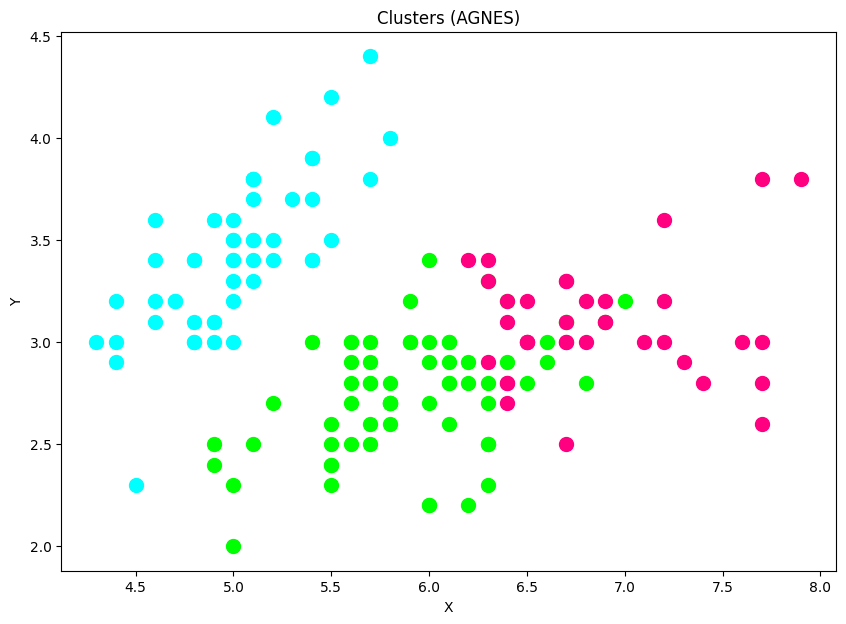

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X[a_labels == 0, 0], X[a_labels == 0, 1], s = 100, c = '#00ff00', label = 'Type 1')
plt.scatter(X[a_labels == 1, 0], X[a_labels == 1, 1], s = 100, c = '#00ffff', label = 'Type 2')
plt.scatter(X[a_labels == 2, 0], X[a_labels == 2, 1], s = 100, c = '#ff0080', label = 'Type 3')
plt.title('Clusters (AGNES)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Fit for DIANA

In [7]:
d_cluster = AgglomerativeClustering(n_clusters=3,linkage='complete')

d_cluster.fit(X)
d_labels=d_cluster.labels_

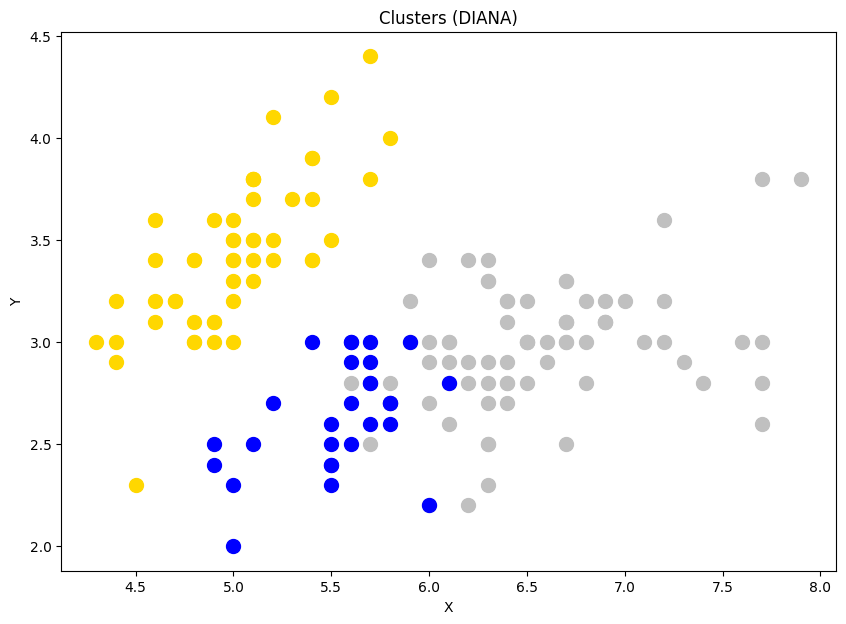

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(X[d_labels == 0, 0], X[d_labels == 0, 1], s = 100, c = 'silver', label = 'Type 1')
plt.scatter(X[d_labels == 1, 0], X[d_labels == 1, 1], s = 100, c = 'gold', label = 'Type 2')
plt.scatter(X[d_labels == 2, 0], X[d_labels == 2, 1], s = 100, c = '#0000ff', label = 'Type 3')
plt.title('Clusters (DIANA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

The Dendrogram shows the hierarchical relationships between the data points, where the height of the vertical lines represents the distance between the clusters. The dendrogram shows that the iris dataset can be divided into 3 clusters. Both AGNES and DIANA clustering also divide the dataset into 3 clusters. However, the clustering outputs look slightly different as AGNES creates more compact clusters while DIANA creates more dispersed clusters. Overall, both methods are effective in clustering the iris dataset